<a href="https://colab.research.google.com/github/sitisasmita/HeartDisease/blob/main/PYTN_Prakerja_Siti_Syekha_Sasmita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

import numpy as np
import pandas as pd

# visualisasi
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use(["ggplot"])

# splitting
from sklearn.model_selection import train_test_split

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report


In [ ]:
#upload data set

df_heart = files.upload()

Saving heart.csv to heart.csv


In [ ]:
#read data csv menggunakan pandas 

df_heart = pd.read_csv('heart.csv')
df_heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
#melihat ukuran (baris & kolom)
df_heart.shape

(1025, 14)

In [ ]:
#melihat informasi mengenai data heart apakah ada missing value atau nilau nul atau tidak, data tiap kolom dalam bentuk apa.

df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#melihat deskripsi data
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [ ]:
#rentang usia histogram
def ageHist(df, n=10, judul="Distribusi Frekuensi"):
    freq, bin_edges = np.histogram(df, bins=n)
    print(freq)
    bin_edges = (bin_edges * 10).astype(int) / 10
    print(bin_edges)

    df.plot(kind="hist", 
                 bins=n,
                 xticks=bin_edges,
                 figsize=(16,8),
                 color=["darksalmon"])

    plt.title(judul)

[  4   0   0  21   0  18  25  32  52  36  48  41  17  60  43  79  69  57
 114  37  68  66  27  56  12  23  11   0   3   6]
[29.  30.6 32.2 33.8 35.4 37.  38.6 40.2 41.8 43.4 45.  46.6 48.2 49.8
 51.4 53.  54.6 56.2 57.8 59.4 61.  62.6 64.2 65.8 67.4 69.  70.6 72.2
 73.8 75.4 77. ]


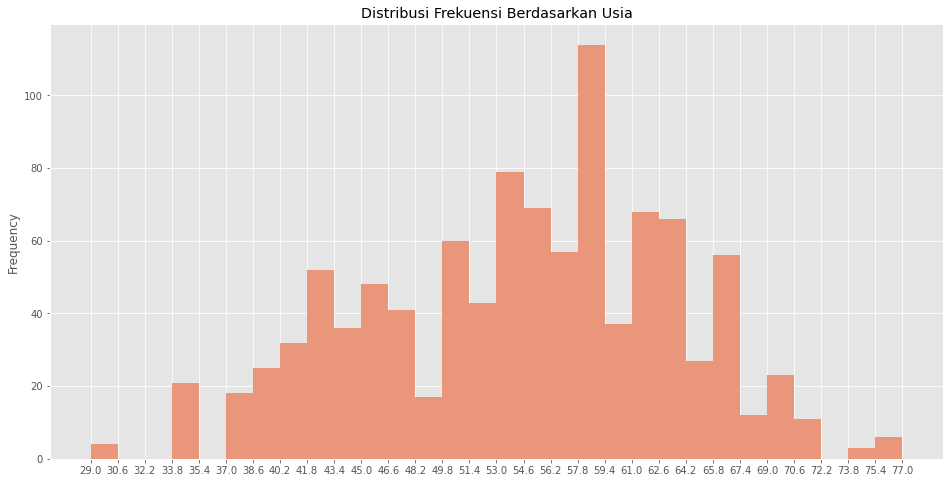

In [ ]:
#panggil function
ageHist(df_heart["age"], 30, "Distribusi Frekuensi Berdasarkan Usia")

[ 1  3  3  4 15 13 16 25 31 43 33 32 31 21 15  7  4  1  1  1]
[49.4 49.9 50.4 50.9 51.4 51.9 52.4 52.9 53.4 53.9 54.4 54.9 55.5 56.
 56.5 57.  57.5 58.  58.5 59.  59.5]


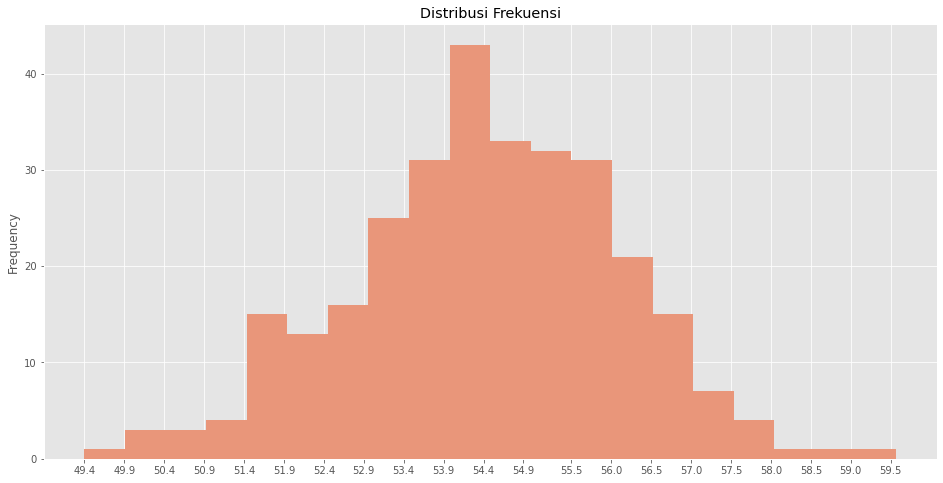

In [ ]:
#normalkan data

sample_means = []
# kita ambil 30 data dari data df_heart["age"], hitung rata2nya, lakukan 300 kali
n = 30
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a= df_heart["age"], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)
    
ageHist(pd.Series(sample_means), 20)

berdasarkan plot diatas dapat dilihat rata-rata usia orang yang memiliki penyakit jantung yang tinggi adalah adalah 54-55 tahun

In [ ]:
#data target (data orang yang miliki penyakit jantung dan tidak memiliki penyakit jantung)
#dengan nilai integer 1 = memiliki penyakit jantung, 0 = tidak memiliki penyakit jantung

df_target = df_heart["target"].value_counts()
df_target

1    526
0    499
Name: target, dtype: int64

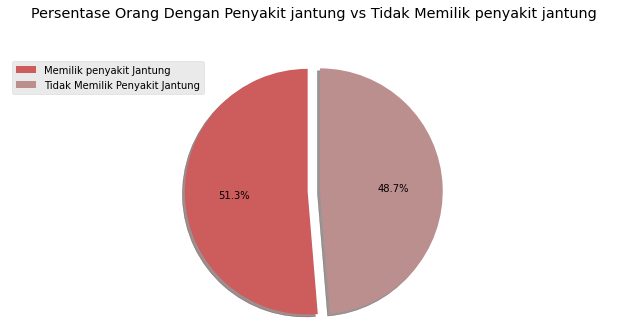

In [ ]:
#Visualisasi pie chart

labels = "Memilik penyakit Jantung", "Tidak Memilik Penyakit Jantung"

df_target.plot(kind="pie",
               colors=["indianred", "rosybrown"],
               shadow=True,
               figsize=(11,5),
               explode=[0, 0.1],
               autopct='%1.1f%%',
               startangle=90,
               labels = None
)

plt.axis('equal') 
plt.legend(labels=labels, loc='upper left') 
plt.title("Persentase Orang Dengan Penyakit jantung vs Tidak Memilik penyakit jantung", y=1.12)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [ ]:
#model prep

target_heartd = df_heart["target"]
target_heartd.shape

(1025,)

In [ ]:
#get data
#karena kita mau melihat classify data target dengan data keseluruhan heart 
#jadi data targetnya harus di drop untuk variabel x
x = df_heart.drop('target', axis=1)
y = df_heart["target"]

# split data jadi training dan testing data
# 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=0)

#display
display(x_train.head())
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
315,42,1,3,148,244,0,0,178,0,0.8,2,2,2
204,66,0,2,146,278,0,0,152,0,0.0,1,1,2
363,53,1,2,130,246,1,0,173,0,0.0,2,3,2
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3


(820, 13) (205, 13)
(820,) (205,)


## **MODEL**

 **Logistic Regression**

In [ ]:
# Logistic Regression
#note : parameter yang digunakan disini menggunakan parameter default 
#membuat model dan latih

model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
#Kita bisa mendapatkan predicted outputs dengan .predict():
y_pred = model_lr.predict(x_test)

In [ ]:
# Kita bisa mendapatkan akurasi dengan .score():
# jika situasi di mana akurasi set pelatihan jauh lebih tinggi mungkin mengindikasikan overfitting

#score training
score_training = model_lr.score(x_train, y_train)
print("hasil dari score training : ")
print(score_training)

#score test
score_test = model_lr.score(x_test, y_test)
print("hasil dari  score test : ")
print(score_test)

hasil dari score training : 
0.8609756097560975
hasil dari  score test : 
0.8682926829268293


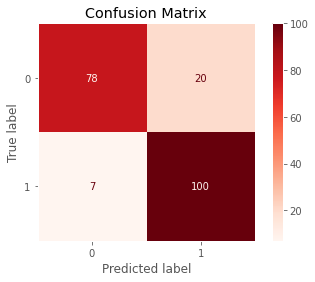

In [ ]:
#confusion matrix display dapat dilihat pada sklearn.metrics.confusionMatrixDisplay

predictions = model_lr.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=model_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_lr.classes_,
                              )
disp.plot(cmap='Reds')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

evaluasi confussion matrix :
TN : 77
FN : 7
FP : 21
TP : 100


In [ ]:
#laporan klasifikasi sebagai string atau dictionary 
#dengan classification_report():

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



**K-Nearest Neighbor (KNN)**

In [ ]:
# KNeighbors Classifier

model_Knnc = KNeighborsClassifier()
model_Knnc.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predknn = model_Knnc.predict(x_test)

In [ ]:
#score training
score_training = model_Knnc.score(x_train, y_train)
print("hasil dari score training : ")
print(score_training)

#score test
score_test = model_Knnc.score(x_test, y_test)
print("hasil dari  score test : ")
print(score_test)

hasil dari score training : 
0.9170731707317074
hasil dari  score test : 
0.7463414634146341


berdasarkan perbandingan score diatas kemungkinan terjadi overfitting

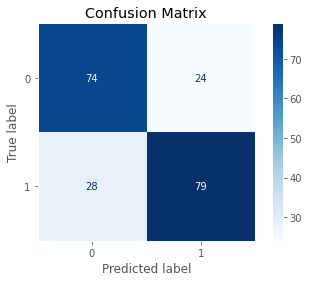

In [ ]:
#confusion matrix display dapat dilihat pada sklearn.metrics.confusionMatrixDisplay

predictions = model_Knnc.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=model_Knnc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_Knnc.classes_,
                              )
disp.plot(cmap='Blues')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#laporan klasifikasi sebagai string atau dictionary 
#dengan classification_report():

print(classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        98
           1       0.77      0.74      0.75       107

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



**Random Forest**

In [ ]:
#Random Forest

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_predrf = model_rf.predict(x_test)

In [ ]:
#score training
score_training = model_rf.score(x_train, y_train)
print("hasil dari score training : ")
print(score_training)

#score test
score_test = model_rf.score(x_test, y_test)
print("hasil dari  score test : ")
print(score_test)

hasil dari score training : 
1.0
hasil dari  score test : 
1.0


perbandingan score training dan score testing adalah sama yaitu 100%, kemungkinan terjadi overfitting

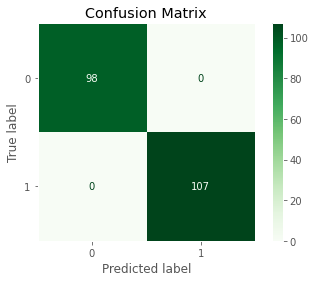

In [ ]:
#confusion matrix display dapat dilihat pada sklearn.metrics.confusionMatrixDisplay

predictions = model_rf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_rf.classes_,
                              )
disp.plot(cmap='Greens')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#laporan klasifikasi 
#dengan classification_report():

print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



**SUPORT VECTOR MACHINE**

In [ ]:
#Support Vector Machine
model_svm = svm.SVC()
model_svm.fit(x_train, y_train)

SVC()

In [ ]:
y_predsvm = model_svm.predict(x_test)

In [ ]:
#score training
score_training = model_svm.score(x_train, y_train)
print("hasil dari score training : ")
print(score_training)

#score test
score_test = model_svm.score(x_test, y_test)
print("hasil dari  score test : ")
print(score_test)

hasil dari score training : 
0.7024390243902439
hasil dari  score test : 
0.7463414634146341


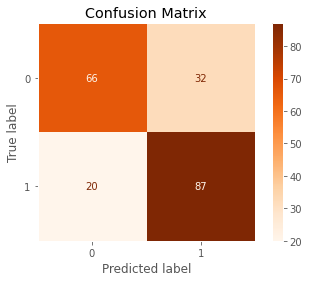

In [ ]:
#confusion matrix display dapat dilihat pada sklearn.metrics.confusionMatrixDisplay

predictions = model_svm.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_svm.classes_,
                              )
disp.plot(cmap='Oranges')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#laporan klasifikasi sebagai string atau dictionary 
#dengan classification_report():

print(classification_report(y_test, y_predsvm))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72        98
           1       0.73      0.81      0.77       107

    accuracy                           0.75       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.75      0.75      0.74       205



**DECISION TREE**

In [ ]:
#Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_preddt = model_dt.predict(x_test)

In [ ]:
#score training
score_training = model_dt.score(x_train, y_train)
print("hasil dari score training : ")
print(score_training)

#score test
score_test = model_dt.score(x_test, y_test)
print("hasil dari  score test : ")
print(score_test)

hasil dari score training : 
1.0
hasil dari  score test : 
1.0


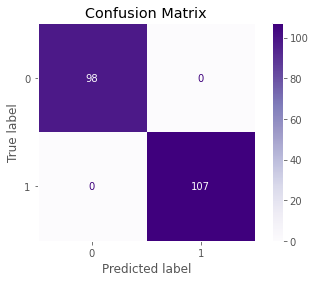

In [ ]:
#confusion matrix display dapat dilihat pada sklearn.metrics.confusionMatrixDisplay

predictions = model_dt.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_dt.classes_,
                              )
disp.plot(cmap='Purples')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#laporan klasifikasi sebagai string atau dictionary 
#dengan classification_report():

print(classification_report(y_test, y_preddt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



**Naive Bayes**

In [ ]:
#Naive Bayes

model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_prednb = model_nb.predict(x_test)

In [ ]:
#score training
score_training = model_nb.score(x_train, y_train)
print("hasil dari score training : ")
print(score_training)

#score test
score_test = model_nb.score(x_test, y_test)
print("hasil dari  score test : ")
print(score_test)

hasil dari score training : 
0.8207317073170731
hasil dari  score test : 
0.8536585365853658


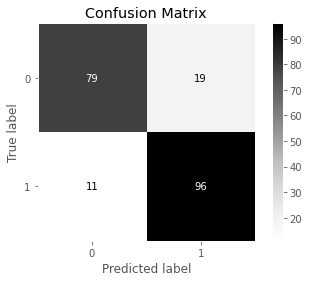

In [ ]:
#confusion matrix display dapat dilihat pada sklearn.metrics.confusionMatrixDisplay

predictions = model_nb.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=model_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_nb.classes_,
                              )
disp.plot(cmap='Greys')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#laporan klasifikasi sebagai string atau dictionary 
#dengan classification_report():

print(classification_report(y_test, y_prednb))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



## **EVALUASI**
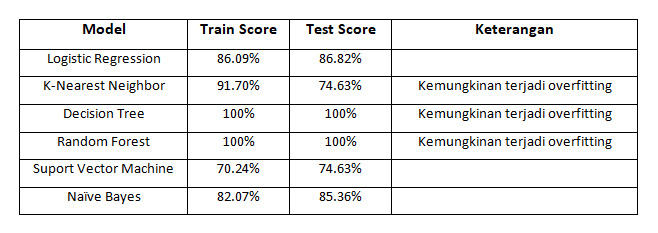

Berdasarkan Model-Model diatas kemungkinan pilihan model terbaik untuk prediksi data baru adalah **Logistic Regression** dengan akurasi mencapai **86.82%**

Pasien baru dengan data sebagai berikut :
1. age = 57 tahun
2. sex = 0 (perempuan)
3. cp = 2 yaitu non-anginal pain
4. trestbps = 130 mm/Hg
5. chol = 298 mg/dl
6. fbs = 1
7. restecg = 0
8. thalach = 160
9. exang = 1
10. oldpeak = 2.2
11. slope = 2
12. ca = 2
13. thal = 1

berapakah prediksi target 0/1 ?
apakah pasien baru tersebut memiliki penyakit jantung (1) atau tidak (0) ?

In [ ]:
data_baru = [[57,	0,	2,	130,	298,	1,	0,	160,	1,	2.2,	2,	2,	1]] 

In [ ]:
df_baru = pd.DataFrame(data_baru, columns =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [ ]:
#prediksi data baru
model_lr.predict(df_baru)

array([1])

Berdasarkan prediksi menggunakan model **Logistic Regression** pasien baru tersebut memiliki target **1** yang mengindikasikan pasien **memiliki penyakit jantung**